<a href="https://colab.research.google.com/github/kamanak/Metro_sales_LSTM/blob/main/metro_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from keras.models import Sequential
from keras.layers import Dropout,Activation,Dense

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
import tensorflow as tf 
from keras.layers import LSTM


# **Feature Engineering**

Metro data is read 
Data has 9 different columns 

In [2]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metro_Interstate_Traffic_Volume.csv')
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
data.loc[:30000,:]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
29996,None,261.49,0.0,0.0,1,Haze,haze,2017-01-12 16:00:00,6026
29997,None,259.72,0.0,0.0,1,Clear,sky is clear,2017-01-12 17:00:00,5992
29998,None,257.60,0.0,0.0,20,Clouds,few clouds,2017-01-12 18:00:00,4434
29999,None,256.59,0.0,0.0,5,Clear,sky is clear,2017-01-12 19:00:00,3185


In [4]:
data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [5]:
#Change date from object to datetime
data['date_time'] = pd.to_datetime(data['date_time'])
#change all the categorical data into label 
for i in data.select_dtypes(object):
  le = LabelEncoder().fit(data[i])
  data[i] = le.transform(data[i])
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,7,288.28,0.0,0.0,40,1,24,2012-10-02 09:00:00,5545
1,7,289.36,0.0,0.0,75,1,2,2012-10-02 10:00:00,4516
2,7,289.58,0.0,0.0,90,1,19,2012-10-02 11:00:00,4767
3,7,290.13,0.0,0.0,90,1,19,2012-10-02 12:00:00,5026
4,7,291.14,0.0,0.0,75,1,2,2012-10-02 13:00:00,4918


Last 10 hours data is used for the testing purpose 

In [6]:

test = data[['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'traffic_volume']].tail(10)
data.drop(data.tail(10).index,inplace=True)

In [7]:
#scaled data for thr LSTM model 
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()

In [8]:
# DATA is divided into X and y where x is an independent feature and y is an dependent feature

X_data = X_scaler.fit_transform(data[['holiday','temp','rain_1h','snow_1h','clouds_all','weather_main','weather_description','traffic_volume']])
y_data = Y_scaler.fit_transform(data[['traffic_volume']])
print(X_data)
print(y_data)

[[0.63636364 0.92972555 0.         ... 0.1        0.64864865 0.76167582]
 [0.63636364 0.93320863 0.         ... 0.1        0.05405405 0.62032967]
 [0.63636364 0.93391815 0.         ... 0.1        0.51351351 0.65480769]
 ...
 [0.63636364 0.91279389 0.         ... 0.6        0.35135135 0.62458791]
 [0.63636364 0.91424517 0.         ... 0.6        0.35135135 0.60164835]
 [0.63636364 0.91424517 0.         ... 0.2        0.2972973  0.60164835]]
[[0.76167582]
 [0.62032967]
 [0.65480769]
 ...
 [0.62458791]
 [0.60164835]
 [0.60164835]]


# LSTM model

 LSTM data should in format of 3d so we change the given multivarient data into  (#batch,#timesteps,#features)

In [9]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
  X = []
  y = []
  start = start + window
  if end is None:
    end = len(dataset) - horizon
  for i in range(start, end):
    indices = range(i-window, i)
    X.append(dataset[indices])
    indicey = range(i+1, i+1+horizon)
    y.append(target[indicey])
  return np.array(X), np.array(y) 

As we are doing multiple-step forecasting, let’s allow the model to see past 48 hours (2days) of data and forecast the 10 hrs after data; for that, we set the horizon to 10.

 




In [10]:
hist_window = 48
horizon = 10
TRAIN_SPLIT = 30000
x_train, y_train = custom_ts_multi_data_prep(X_data, y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, y_data, TRAIN_SPLIT, None, hist_window, horizon)



In [11]:
print('Multiple window of past history\n')
print(x_train[0])
print('\n target horizon \n')
print(y_train[0])

Multiple window of past history

[[0.63636364 0.92972555 0.         0.         0.4        0.1
  0.64864865 0.76167582]
 [0.63636364 0.93320863 0.         0.         0.75       0.1
  0.05405405 0.62032967]
 [0.63636364 0.93391815 0.         0.         0.9        0.1
  0.51351351 0.65480769]
 [0.63636364 0.93569194 0.         0.         0.9        0.1
  0.51351351 0.69038462]
 [0.63636364 0.93894927 0.         0.         0.75       0.1
  0.05405405 0.67554945]
 [0.63636364 0.94081981 0.         0.         0.01       0.
  0.72972973 0.71167582]
 [0.63636364 0.94549618 0.         0.         0.01       0.
  0.72972973 0.76703297]
 [0.63636364 0.94772148 0.         0.         0.01       0.
  0.72972973 0.82623626]
 [0.63636364 0.9486245  0.         0.         0.2        0.1
  0.10810811 0.79546703]
 [0.63636364 0.94527042 0.         0.         0.2        0.1
  0.10810811 0.65521978]
 [0.63636364 0.93840101 0.         0.         0.2        0.1
  0.10810811 0.48612637]
 [0.63636364 0.93327313 

In [13]:
batch_size = 256
buffer_size = 150
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [14]:
train_data

<RepeatDataset element_spec=(TensorSpec(shape=(None, 48, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10, 1), dtype=tf.float64, name=None))>

In [15]:

x_train.shape

(29952, 48, 8)

In [40]:

lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(200, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(50, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(units=horizon),
 ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 48, 400)          334400    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 48, 400)           0         
                                                                 
 dense_8 (Dense)             (None, 48, 200)           80200     
                                                                 
 dropout_8 (Dropout)         (None, 48, 200)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 300)              421200    
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 300)              

In [41]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
# early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
# checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
# callbacks=[early_stopings,checkpoint] 
history = lstm_model.fit(train_data,epochs=50,steps_per_epoch = 100,validation_data = val_data,validation_steps=50)

Epoch 1/50
100/100 [==============================] - 12s 62ms/step - loss: 0.1137 - val_loss: 0.0855
Epoch 2/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0752 - val_loss: 0.0788
Epoch 3/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0642 - val_loss: 0.0466
Epoch 4/50
100/100 [==============================] - 5s 49ms/step - loss: 0.0597 - val_loss: 0.0417
Epoch 5/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0554 - val_loss: 0.0460
Epoch 6/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0523 - val_loss: 0.0433
Epoch 7/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0524 - val_loss: 0.0455
Epoch 8/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0514 - val_loss: 0.0447
Epoch 9/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0463 - val_loss: 0.0714
Epoch 10/50
100/100 [==============================] - 5s 48ms/step - loss: 0.0464 - val_l

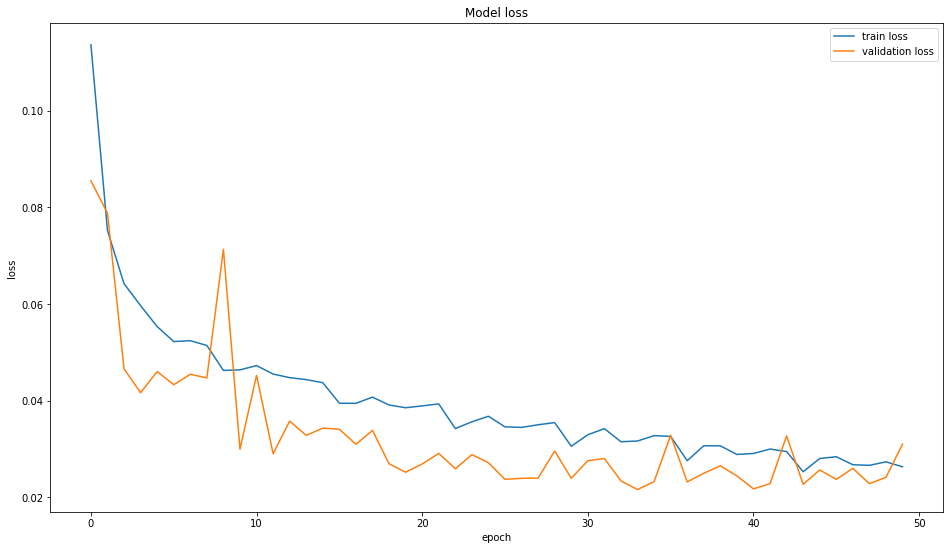

In [42]:
 plt.figure(figsize=(16,9))
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('Model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train loss', 'validation loss'])
 plt.show() 

Prepare the testing data for the last 48 hrs and check the prediction against it by visualizing the actual and predicted values. Finally, evaluate the result with standard performance metrics.

In [43]:
data_val = X_scaler.fit_transform(data[['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main','weather_description', 'traffic_volume']].tail(48))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
pred = lstm_model.predict(val_rescaled)
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse 

array([[5228.1865, 4760.029 , 4149.997 , 3489.0496, 2882.6716, 2337.9348,
        1868.7932, 1509.4246, 1320.9279, 1334.8789]], dtype=float32)

In [44]:
pred_Inverse[0]

array([5228.1865, 4760.029 , 4149.997 , 3489.0496, 2882.6716, 2337.9348,
       1868.7932, 1509.4246, 1320.9279, 1334.8789], dtype=float32)

In [45]:
test

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
48194,7,283.84,0.00,0.0,75,6,20,4302
48195,7,283.84,0.00,0.0,75,2,11,4302
48196,7,284.38,0.00,0.0,75,6,13,4283
48197,7,284.79,0.00,0.0,75,1,2,4132
48198,7,284.20,0.25,0.0,75,6,13,3947
48199,7,283.45,0.00,0.0,75,1,2,3543
48200,7,282.76,0.00,0.0,90,1,19,2781
48201,7,282.73,0.00,0.0,90,10,21,2159
48202,7,282.09,0.00,0.0,90,1,19,1450
48203,7,282.12,0.00,0.0,90,1,19,954


In [46]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 






In [47]:
timeseries_evaluation_metrics_func(test['traffic_volume'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 549946.1724829271
MAE is : 650.1295532226562
RMSE is : 741.5835573169938
MAPE is : 22.353399802210827
R2 is : 0.620990152847698



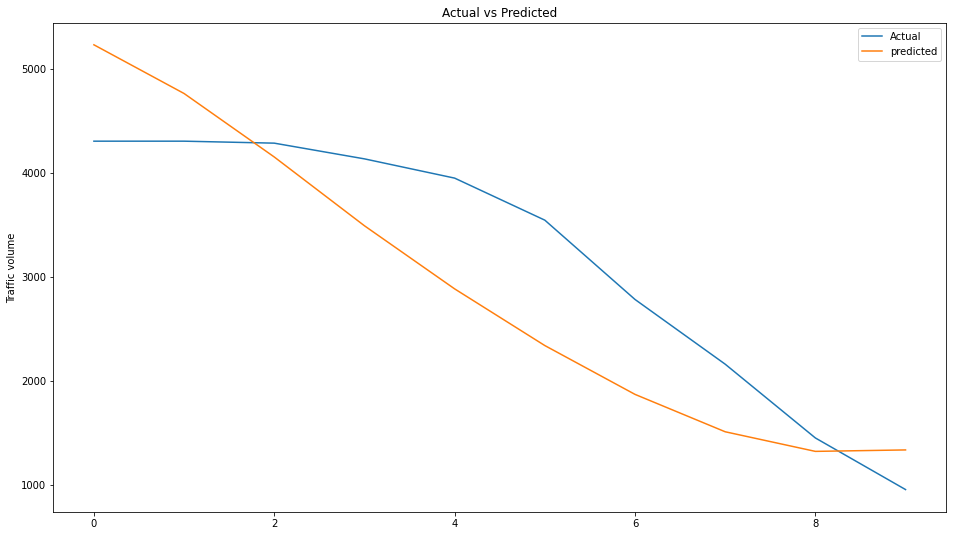

In [48]:
 plt.figure(figsize=(16,9))
 plt.plot( list(test['traffic_volume']))
 plt.plot( list(pred_Inverse[0]))
 plt.title("Actual vs Predicted")
 plt.ylabel("Traffic volume")
 plt.legend(('Actual','predicted'))
 plt.show() 

In [49]:
pred_Inverse[0]

array([5228.1865, 4760.029 , 4149.997 , 3489.0496, 2882.6716, 2337.9348,
       1868.7932, 1509.4246, 1320.9279, 1334.8789], dtype=float32)

In [50]:
final_data = test['traffic_volume'].reset_index().drop('index',axis=1)

In [51]:
final_data['predicted'] = pred_Inverse[0]

In [52]:
final_data

,traffic_volume,predicted
0,4302,5228.186523
1,4302,4760.028809
2,4283,4149.997070
3,4132,3489.049561
4,3947,2882.671631
5,3543,2337.934814
6,2781,1868.793213
7,2159,1509.424561
8,1450,1320.927856
9,954,1334.878906


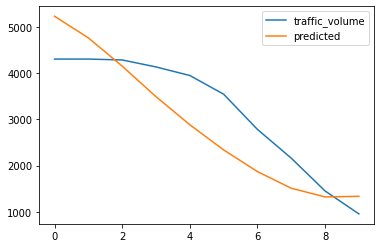

In [53]:
final_data.plot()